In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.models import Sequential
from keras.layers import Dense #층, 건물안의 층 하나, 뉴런의 층
from keras.utils import np_utils #공구상자

Using TensorFlow backend.


### 데이터를 만들어서 시각화 

In [4]:
# one hot encoding을 통해서 A를 01이런 식으로 범주형 데이터를 순서형 데이터로 바꾸어주어야 함.
#범주형 중 명목형다루기
#데이터 만들기.-3.14~+3.14,500개 난수 발생
x=np.random.uniform(-np.pi,np.pi,500)
y=np.random.uniform(-1,1,500)

In [5]:
print(x[:5]) # x axis
print(y[:5]) # y axis

[ 1.04726666 -1.90780844  1.83065079 -0.37303725  3.06399556]
[-0.70150389 -0.1063514  -0.18673501  0.67326647 -0.64650382]


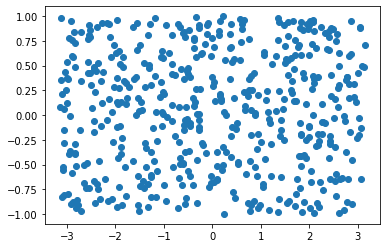

In [6]:
#점으로 찍어주기 
plt. scatter(x,y)
plt.show()

In [7]:
#우리는 x,y 가 하나로 붙어서 점으로 관리 될 때
X=np.array([[x[i],y[i]]for i in range(500)]) #2차원 구조로만들기. 점으로 만듬
#Q. 위에도 점으로 나오는데 위에는 안묶은거구 밑에는 묶은건가?

In [8]:
X.shape

(500, 2)

In [9]:
sine=np.sin(x)

In [10]:
sine[:5]

array([ 0.86605996, -0.94374688,  0.96642738, -0.36444548,  0.07751924])

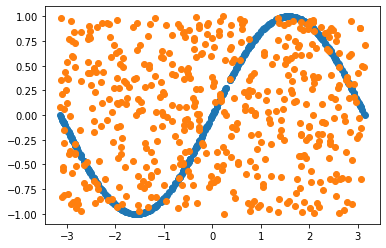

In [11]:
plt.scatter(x,sine)
plt.scatter(X[:,0],X[:,1]) #X의 모든 행의 첫번째는 x축, 두번째는 y축
plt.show()

In [12]:
#싸인그래프의 위, 아래에 따라 색 구분
Y=X[:,1]>sine #true false가 됨

In [13]:
Y[:10]

array([False,  True, False,  True, False, False, False, False, False,
       False])

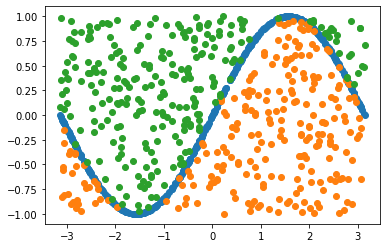

In [14]:
# 요정도는 할 수 있어야함
plt.scatter(x,sine)
plt.scatter(X[:,0][Y==0],X[:,1][Y==0]) #아래쪽.0은 false
plt.scatter(X[:,0][Y==1],X[:,1][Y==1])
plt.show()

### 모델을 설계하여 훈련

In [15]:
model=Sequential() #건물

In [16]:
#1층,사무실이 10개있다, 엘베는 relu다,  입력 데이터는 x,y로 2개이다.입구로부터 두명씩 들어온다.
model.add(Dense(10,activation='relu',input_shape=(2,)))
#2층 사무실 10개, 엘베 relu, 입구가 없음
model.add(Dense(10,activation='relu'))
#3층 사무실 10개, 엘베 relu, 입구가 없음
model.add(Dense(10,activation='relu'))
#3층 사무실 10개, 엘베 relu, 입구가 없음
model.add(Dense(10,activation='relu'))
#마지막 층, 경우의 수 2개(초록&주황 점), 다중분류 softmax
model.add(Dense(2,activation='softmax'))

In [17]:
#한눈에 보여줌
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',optimizer='sgd')#여러가지 설정해줌

In [19]:
#Y값 변형
Y[:10]

array([False,  True, False,  True, False, False, False, False, False,
       False])

In [20]:
#true false로 쓰면안된다. one hot encoding으로 써야 함
Y_onehot=np_utils.to_categorical(Y)
Y_onehot[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [21]:
#true->[0,1]/ false->[1,0], 임의대로 바꿔서 할 수 있긴 함
model.fit(X,Y_onehot,epochs=200) #200번 학습

Epoch 1/200
500/500 [==============================] - 0s 630us/step - loss: 0.7045
Epoch 2/200
500/500 [==============================] - 0s 36us/step - loss: 0.6985
Epoch 3/200
500/500 [==============================] - 0s 26us/step - loss: 0.6939
Epoch 4/200
500/500 [==============================] - 0s 30us/step - loss: 0.6899
Epoch 5/200
500/500 [==============================] - 0s 104us/step - loss: 0.6860
Epoch 6/200
500/500 [==============================] - 0s 46us/step - loss: 0.6823
Epoch 7/200
500/500 [==============================] - 0s 28us/step - loss: 0.6785
Epoch 8/200
500/500 [==============================] - 0s 24us/step - loss: 0.6747
Epoch 9/200
500/500 [==============================] - 0s 24us/step - loss: 0.6706
Epoch 10/200
500/500 [==============================] - 0s 22us/step - loss: 0.6664
Epoch 11/200
500/500 [==============================] - 0s 24us/step - loss: 0.6619
Epoch 12/200
500/500 [==============================] - 0s 22us/step - loss: 0.6571

500/500 [==============================] - 0s 22us/step - loss: 0.1949
Epoch 195/200
500/500 [==============================] - 0s 22us/step - loss: 0.1918
Epoch 196/200
500/500 [==============================] - 0s 22us/step - loss: 0.1901
Epoch 197/200
500/500 [==============================] - 0s 24us/step - loss: 0.1871
Epoch 198/200
500/500 [==============================] - 0s 24us/step - loss: 0.1864
Epoch 199/200
500/500 [==============================] - 0s 24us/step - loss: 0.1818
Epoch 200/200
500/500 [==============================] - 0s 22us/step - loss: 0.1781


In [22]:
print('test loss:',model.evaluate(X,Y_onehot))

500/500 [==============================] - 0s 96us/step
test loss: 0.17488748240470886


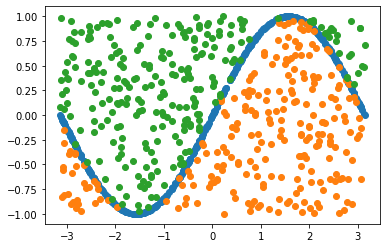

In [23]:
plt.scatter(x,sine)
plt.scatter(X[:,0][Y==0],X[:,1][Y==0]) #아래쪽.0은 false
plt.scatter(X[:,0][Y==1],X[:,1][Y==1])
plt.show()

In [24]:
a=[-2,0] #초록색 점, Y_onehot [0,1]
b=[2,0] #오랜지색 점, Y_onehot [1,0]
pred_x=np.vstack((a,b))
#위에서 아래로 쌓는 것
pred_x

array([[-2,  0],
       [ 2,  0]])

In [25]:
#예측 -> 예측이라는게
pred=model.predict(pred_x)

In [26]:
pred
#array([[1.9830486e-02, 9.8016948e-01], -> 초록색이 90퍼센트=> 정답이 초록색
#       [9.9997616e-01, 2.3825107e-05]], dtype=float32) -> 주황색이 90퍼센트
#초록색 true ==> Y_onehot [0,1] -> 초록색 확률이 뒤에
#오렌지색 false ==> Y_onehot [1,0] -> 오렌지 색 확률이 앞에
#[오렌지색일 확률, 초록색일 확률]
#예) 3가지인 경우 : [강아지, 고양이, 돼지]

array([[0.16502063, 0.8349794 ],
       [0.9955916 , 0.00440836]], dtype=float32)

## 수입 예제

https://archive.ics.uci.edu/ml/datasets/Adult

In [27]:
import pandas as pd
import seaborn as sns

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler

In [29]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country','5k']

In [30]:
df=pd.read_csv('C:/Users/User/study_ai/datasets/adult.data',index_col=False, names=names)

In [31]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,5k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
df.isnull().any #컬럼별로 체크 가능

<bound method DataFrame.any of          age  workclass  fnlwgt  education  education-num  marital-status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race    se

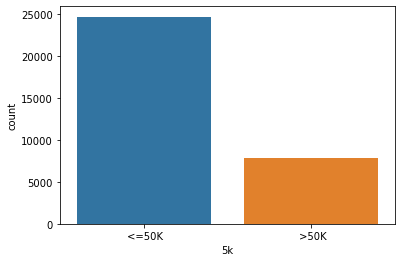

In [34]:
sns.countplot('5k',data=df)

In [35]:
df['5k'].value_counts()

 <=50K    24720
 >50K      7841
Name: 5k, dtype: int64

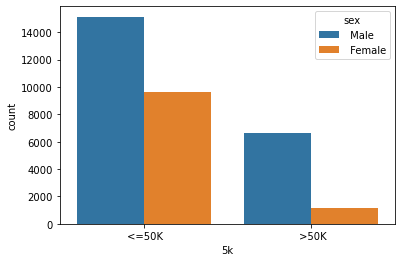

In [36]:
sns.countplot('5k',hue='sex',data=df)

In [37]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


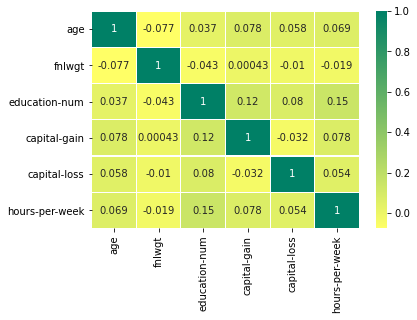

In [38]:
sns.heatmap(df.corr(),annot=True, cmap='summer_r',linewidths=0.2)
#education num이 중요한 역할 중 하나

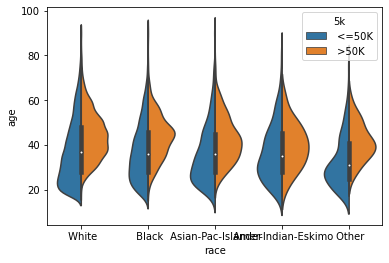

In [39]:
sns.violinplot('race','age',hue='5k',data=df,split=True)

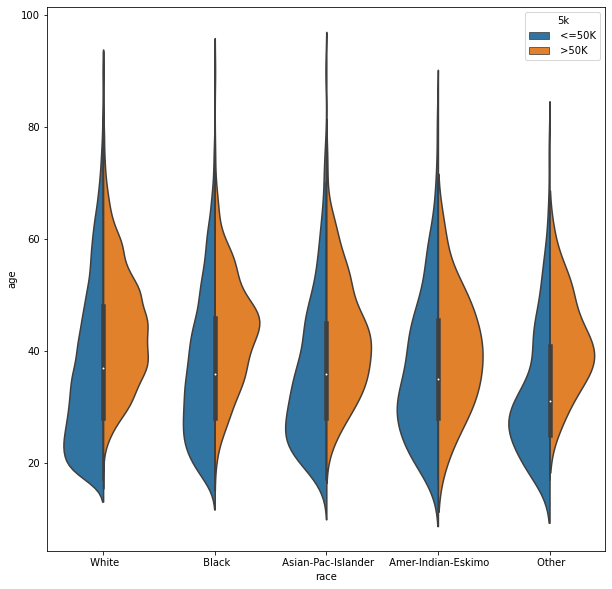

In [40]:
#인종과 나이는 큰 상관관계가 없다.
#크기 좀 키움
plt.figure(figsize=(10,10))
sns.violinplot('race','age',hue='5k',data=df,split=True)

In [41]:
df['5k'].values

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [42]:
#글자로 나와있어서 숫자로 바꾸어줘야 함
Y=df['5k'].values.tolist() #array을 list로 바꿀 수 있게됨
Y

[' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',

In [43]:
Y=[1 if i==' <=50K' else 0 for i in Y]
#Y에있는 i에 대해 50K이하이면 1을 넣음.그렇지 않으면 0을 리턴

In [44]:
Y[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

In [45]:
#다시 원 핫
Y=np_utils.to_categorical(Y)
#0,1이라는 숫자로 바꾸고 이걸 또 원 핫 인코딩으로 바꾸어야
# 저번에 M F도 그랬었음

In [46]:
Y[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [47]:
df.head(
)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,5k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  5k              32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [49]:
#숫자로 되어있는것을 뽑고, 나머지 글자에 대해 원 핫 인코딩

In [50]:
#숫자 선언
nums=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [51]:
X=df.drop(nums, axis=1) #1이 열.nums빼고 문자인 데이터만 얻기.그저께 헸

In [52]:
X.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,5k
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [53]:
#정답인 5k 빼기. 그래서 그랬던 것구나
X=X.drop('5k',axis=1)

In [54]:
X.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [55]:
#숫자와 문자가 섞여있는것을 머신러닝으로 했으므로 딥러닝으로 했음. 데이터 뽑는 과정은 같음

In [56]:
X=pd.get_dummies(X,drop_first=True)

In [57]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#숫자들로 되어있은거 다시 합춰야 함
X=pd.concat([X,df[nums]], axis=1)

In [59]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40


In [60]:
#더미가 너무 큰 데이터를 스케일러로 줄이기-> 그냥 일반적으로 다 씀
scaler=MinMaxScaler()

In [61]:
X[nums]=scaler.fit_transform(X[nums]) #숫자 컬럼들만 변화

In [62]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [63]:
#train test split도 가능하긴 하지만 지금은 그냥 임의대로 하고싶음

In [64]:
X.shape

(32561, 100)

In [65]:
X_train=X[:-1000]
X_test=X[-1000:]
#3만 몇개중에 test로 천개만 스자

In [66]:
X_train.shape,X_test.shape #잘 분류되기 함

((31561, 100), (1000, 100))

In [67]:
Y_train=Y[:-1000]
Y_test = Y[-1000:]

In [68]:
Y_train.shape, Y_test.shape

((31561, 2), (1000, 2))

## 여기까지 데이터 전처리
____

In [69]:
#이거 다음 설계 => 피트 => evaluate => predict 머신러닝이랑 유사

In [70]:
model=Sequential()

In [71]:
model.add(Dense(1024,activation='relu',input_shape=(100,)))
#사무실 128기준 2배하거나 나누거나, 컬럼 갯수 100개
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [72]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#정확도에 관심
#우리가 고칠 수 있는건 뉴런의 갯수와 모델의 수. 나머지는 거의 정해져있음

In [73]:
hist = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)
#20퍼센트
#3번 질문

Train on 25248 samples, validate on 6313 samples
Epoch 1/10
25248/25248 [==============================] - 9s 341us/step - loss: 0.3561 - acc: 0.8339 - val_loss: 0.3309 - val_acc: 0.8475
Epoch 2/10
25248/25248 [==============================] - ETA: 0s - loss: 0.3273 - acc: 0.847 - 8s 315us/step - loss: 0.3272 - acc: 0.8479 - val_loss: 0.3272 - val_acc: 0.8482
Epoch 3/10
25248/25248 [==============================] - 9s 337us/step - loss: 0.3186 - acc: 0.8522 - val_loss: 0.3353 - val_acc: 0.8376
Epoch 4/10
25248/25248 [==============================] - 9s 358us/step - loss: 0.3095 - acc: 0.8564 - val_loss: 0.3247 - val_acc: 0.8500
Epoch 5/10
25248/25248 [==============================] - 10s 382us/step - loss: 0.3029 - acc: 0.8593 - val_loss: 0.3176 - val_acc: 0.8535
Epoch 6/10
25248/25248 [==============================] - 9s 363us/step - loss: 0.2954 - acc: 0.8626 - val_loss: 0.3278 - val_acc: 0.8538
Epoch 7/10
25248/25248 [==============================] - 9s 361us/step - loss: 0.29

In [74]:
hist.history

{'val_loss': [0.33092886873702515,
  0.327169820040809,
  0.33526175423958554,
  0.3246974532330034,
  0.31760688805644344,
  0.32784588377921003,
  0.3325886929231571,
  0.3689512223661484,
  0.35653247293241236,
  0.35946935219827403],
 'val_acc': [0.8474576271375273,
  0.8482496436020283,
  0.8376366228511967,
  0.8499920798541437,
  0.8534769523394914,
  0.8537937589290685,
  0.8480912403072398,
  0.829082844932616,
  0.8507840963280864,
  0.8531601457404728],
 'loss': [0.3560860171932987,
  0.3271936030517815,
  0.3186101371420049,
  0.30952204151978513,
  0.3028886107909664,
  0.2953533531274028,
  0.29065718526358236,
  0.2830675370113025,
  0.27835248630725234,
  0.27267511313632414],
 'acc': [0.8339274397972116,
  0.8478691381495564,
  0.8521863117870723,
  0.8564242712294043,
  0.8593155893536122,
  0.8626425855513308,
  0.8644249049429658,
  0.8671577946768061,
  0.8685044359949303,
  0.8709204689480355]}

<function matplotlib.pyplot.show(*args, **kw)>

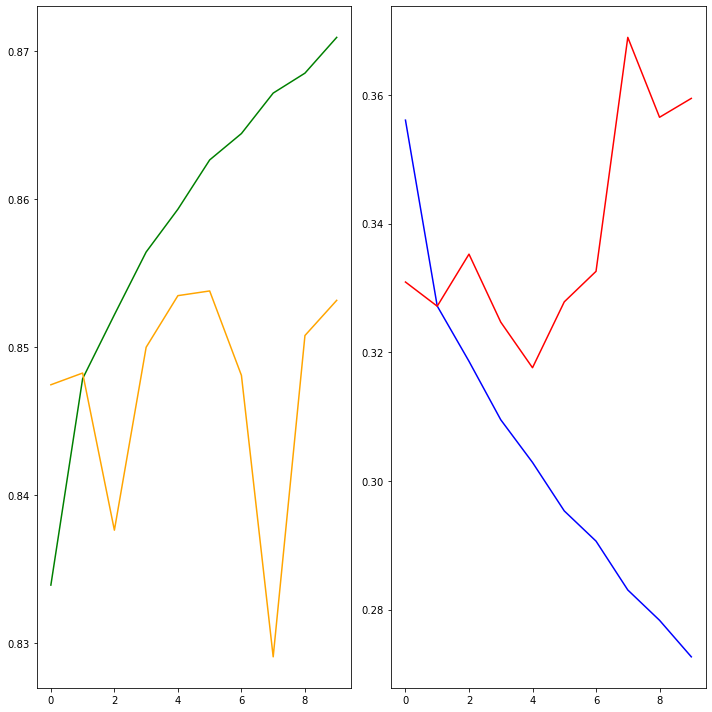

In [75]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(hist.history['acc'],color='green')
plt.plot(hist.history['val_acc'],color='orange')
plt.subplot(122)
plt.plot(hist.history['loss'],color='blue')
plt.plot(hist.history['val_loss'],color='red')
plt.tight_layout()
plt.show

In [76]:
model.evaluate(X_test, Y_test)
# [0.38387712597846985, 0.829]
# [loss, acc]
# 비용 : 0.38387712597846985
# 정확도 : 0.829 ==> 82.9%

1000/1000 [==============================] - 0s 78us/step


[0.3697604594230652, 0.836]

In [77]:
pred = model.predict(X_test)

In [78]:
pred[:10]
# 1 ==> [0,1], 0 ==> [1,0]
# [ '>5K', ' <=50K'는 1 ]
# [ 0일확율, 1일확율 ]

array([[9.6068466e-01, 3.9315391e-02],
       [4.5543890e-02, 9.5445615e-01],
       [4.3189743e-01, 5.6810254e-01],
       [9.8510599e-03, 9.9014890e-01],
       [8.3711857e-01, 1.6288140e-01],
       [3.3991379e-03, 9.9660093e-01],
       [1.7585509e-03, 9.9824142e-01],
       [1.3257674e-06, 9.9999869e-01],
       [5.2837390e-01, 4.7162607e-01],
       [1.3698667e-05, 9.9998629e-01]], dtype=float32)

In [79]:
Y[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## 다른 예시
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [80]:
%matplotlib inline

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [82]:
names=['sl','sw','pl','pw','class']

In [83]:
df=pd.read_csv('C:/Users/User/study_ai/datasets/iris.data',names=names)

In [84]:
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [86]:
#class을 원 핫 인코딩을 해주어야 함. 
#LabelEndor을 하면 if 문 쓰지 않고도 간단하게 바꾸어준다.-> 앞에서도 쓸 수 있다.
Y_encoded=LabelEncoder().fit_transform(df['class'])

In [87]:
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
Y=np_utils.to_categorical(Y_encoded)

In [89]:
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [90]:
#정답인 class빼고
X=df.drop('class',axis=1)

In [91]:
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1, random_state=0)

In [94]:
model=Sequential()

In [95]:
model.add(Dense(256,activation='relu',input_shape=(4,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax')) #iris 분류하는게 3개이므로 3개!!!!

In [96]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#                    softmax쓸 때는 이거                               정확도 기준
#머신러닝 딥러닝은 설명가능한게 아직은 부족함. 정확히 데이터를 이해할 수 있어야.
#코드 자체는 점점 쉬워짐

In [97]:
hist=model.fit(X_train,y_train,epochs=50,validation_split=0.1)
#주로 validation_split많이 씀

Train on 121 samples, validate on 14 samples
Epoch 1/50
121/121 [==============================] - 1s 4ms/step - loss: 1.0327 - acc: 0.4050 - val_loss: 0.9154 - val_acc: 0.6429
Epoch 2/50
121/121 [==============================] - 0s 115us/step - loss: 0.8188 - acc: 0.7769 - val_loss: 0.7247 - val_acc: 0.8571
Epoch 3/50
121/121 [==============================] - 0s 206us/step - loss: 0.6760 - acc: 0.8264 - val_loss: 0.6361 - val_acc: 0.6429
Epoch 4/50
121/121 [==============================] - 0s 148us/step - loss: 0.6056 - acc: 0.6942 - val_loss: 0.5452 - val_acc: 0.6429
Epoch 5/50
121/121 [==============================] - 0s 165us/step - loss: 0.5032 - acc: 0.9008 - val_loss: 0.4603 - val_acc: 1.0000
Epoch 6/50
121/121 [==============================] - 0s 445us/step - loss: 0.4633 - acc: 0.9256 - val_loss: 0.4254 - val_acc: 0.8571
Epoch 7/50
121/121 [==============================] - 0s 99us/step - loss: 0.4063 - acc: 0.8430 - val_loss: 0.3811 - val_acc: 0.8571
Epoch 8/50
121/121 [

<function matplotlib.pyplot.show(*args, **kw)>

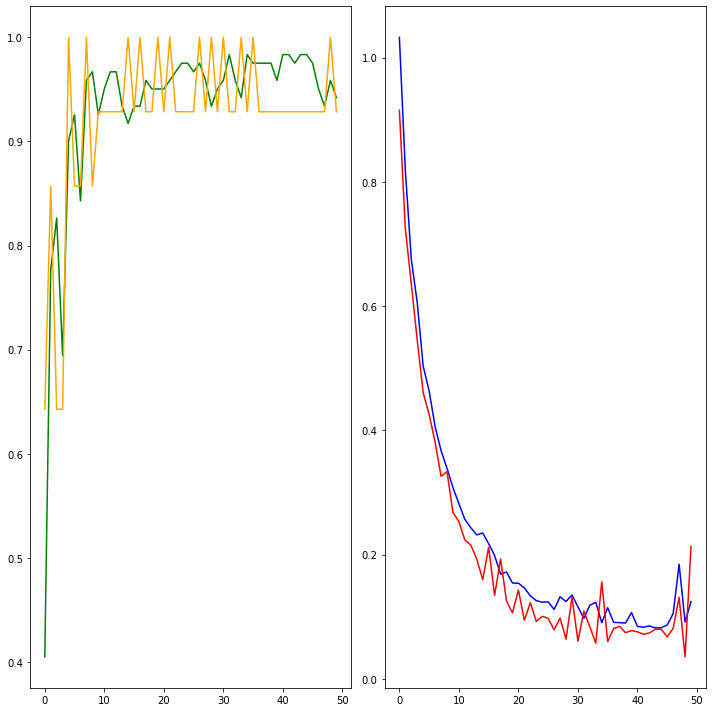

In [98]:
#비용이 잘 떨어지고 정확도가 올라가는지 잘 체크
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(hist.history['acc'],color='green') #꾸준히 올라감
plt.plot(hist.history['val_acc'],color='orange') #왔다갔다
plt.subplot(122)
plt.plot(hist.history['loss'],color='blue') #잘 떨어짐
plt.plot(hist.history['val_loss'],color='red') 
plt.tight_layout()
plt.show

In [99]:
loss_score=model.evaluate(X_test,y_test)
print('test loss:{:.2f}'.format(loss_score[0]))
print('test acc:{:.2f}'.format(loss_score[1]))

15/15 [==============================] - 0s 133us/step
test loss:0.09
test acc:1.00


In [100]:
pred=model.predict(X_test)

In [101]:
pred[:5] #아 5개만 한거구나아

array([[5.7056715e-09, 1.2337952e-04, 9.9987662e-01],
       [6.2061701e-04, 9.8013812e-01, 1.9241227e-02],
       [9.9978405e-01, 2.1578143e-04, 2.8941639e-07],
       [3.9875414e-09, 8.5150800e-04, 9.9914849e-01],
       [9.9898857e-01, 1.0085367e-03, 2.8081979e-06]], dtype=float32)

In [102]:
y_test[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [103]:
#요약
#1. model-Sequential()
#2. model.add(Dense(x,activation='relu'...))
#3. model.compile(loss='...',optimizer='adam',metrics=['accuracy'])
#4. model.fit(X_train,y_train,...)  #train
#5. model.evaluate(x_test,y_test)   #test
#6. model.predict(X_new)

__________
## 콘크리트 예제
http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [126]:
df=pd.read_excel('C:/Users/User/study_ai/datasets/Concrete_Data.xls')

In [127]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [128]:
#column명이 너무 길다-> 이름을 바꾸는 방법
df=df.rename(columns={
    "Cement (component 1)(kg in a m^3 mixture)":'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'ply',
    'Water  (component 4)(kg in a m^3 mixture)':'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'super',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine',
    'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'strength'
})

In [129]:
df.columns

Index(['cement', 'blast', 'ply', 'water', 'super', 'coarse', 'fine', 'age',
       'strength'],
      dtype='object')

In [130]:
X=df.drop(['strength'],axis=1)

In [131]:
Y=df['strength']

In [132]:
scaler=MinMaxScaler()

In [133]:
X=scaler.fit_transform(X)

In [134]:
X

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

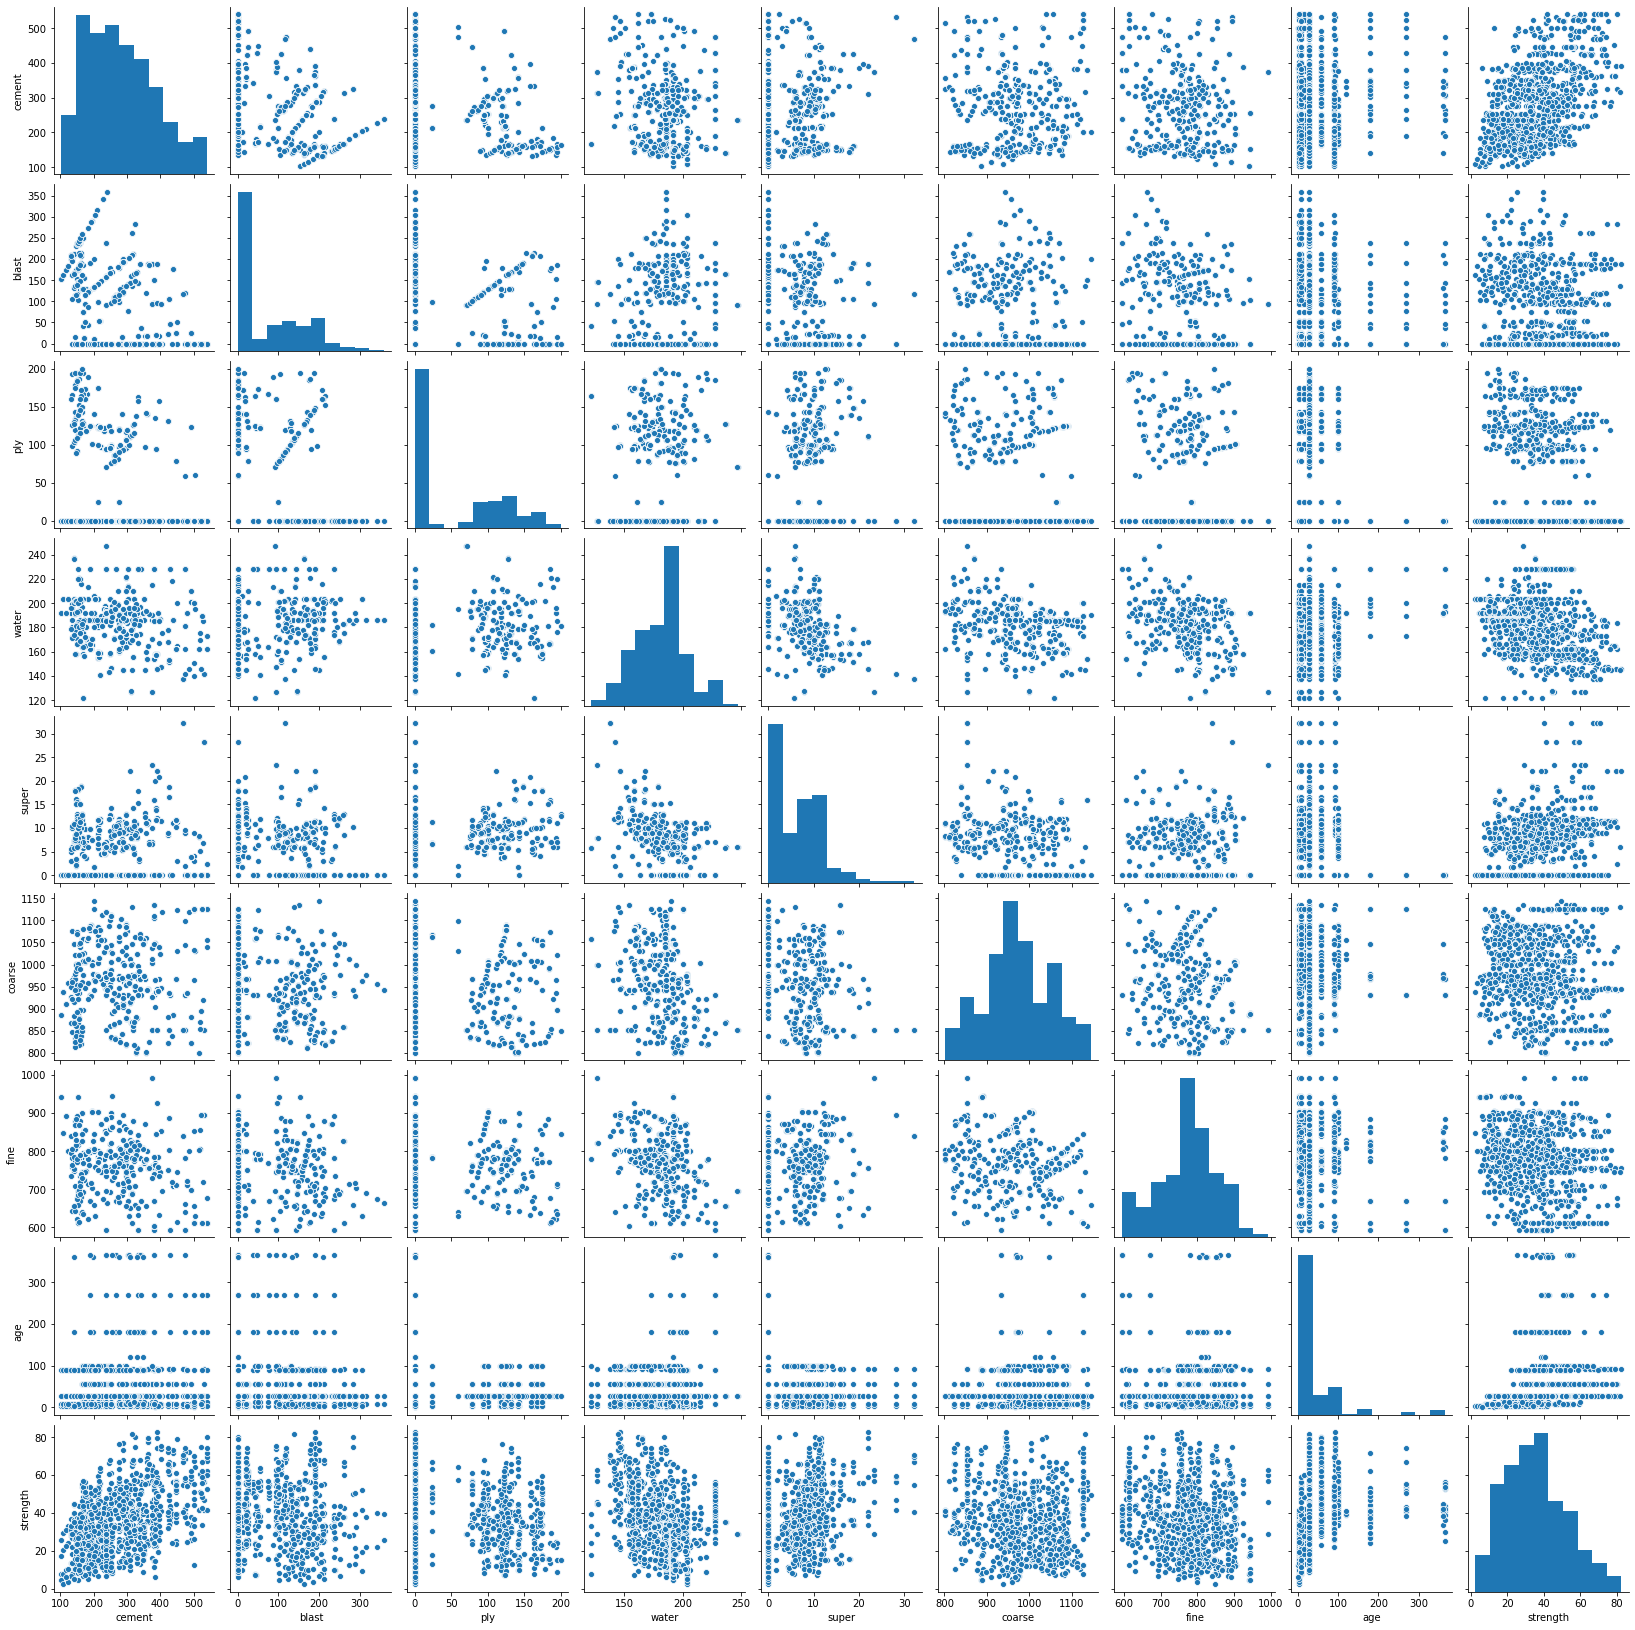

In [135]:
sns.pairplot(df) #데이터가 어떤 경향을 이루는지
#사람이 눈으로 구별하기 어려운 데이터구납

In [136]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)

In [137]:
X_train.shape,X_test.shape

((927, 8), (103, 8))

In [138]:
model=Sequential()

In [139]:
model.add(Dense(256,activation='relu',input_shape=(8,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='relu')) #여기가 왜 한개야

In [140]:
model.compile(loss='mse',optimizer='adam')
hist=model.fit(X_train, y_train,epochs=100, batch_size=10, validation_split=100)

Epoch 1/100
927/927 [==============================] - 1s 806us/step - loss: 892.7359
Epoch 2/100
927/927 [==============================] - 0s 261us/step - loss: 177.2894
Epoch 3/100
927/927 [==============================] - 0s 170us/step - loss: 129.9624
Epoch 4/100
927/927 [==============================] - 0s 161us/step - loss: 117.4713
Epoch 5/100
927/927 [==============================] - 0s 205us/step - loss: 110.0286
Epoch 6/100
927/927 [==============================] - 0s 229us/step - loss: 104.3905
Epoch 7/100
927/927 [==============================] - 0s 264us/step - loss: 97.4721
Epoch 8/100
927/927 [==============================] - 0s 369us/step - loss: 90.5654
Epoch 9/100
927/927 [==============================] - 0s 286us/step - loss: 82.0493
Epoch 10/100
927/927 [==============================] - 0s 310us/step - loss: 74.6388
Epoch 11/100
927/927 [==============================] - 0s 190us/step - loss: 67.8337
Epoch 12/100
927/927 [==============================] - 0

In [141]:
loss_score=model.evaluate(X_test, y_test)

103/103 [==============================] - 0s 920us/step


In [142]:
pred = model.predict(X_test[-5:])

In [143]:
pred

array([[51.368973],
       [45.868843],
       [27.538921],
       [42.699783],
       [51.11884 ]], dtype=float32)

In [144]:
y_test[-5:]

742     54.275551
114     22.897498
877     31.419421
218     40.389504
1002    57.218234
Name: strength, dtype: float64

KeyError: 'val_loss'

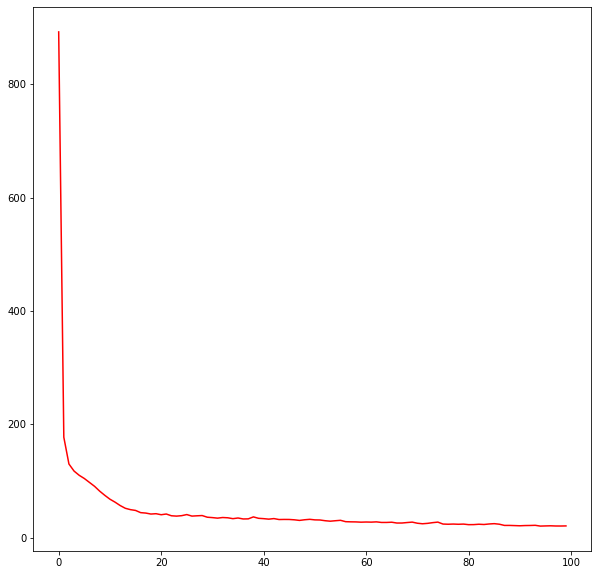

In [145]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.title('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## 손글씨 숫자 분류 문제

In [149]:
import keras
mnist = keras.datasets.mnist

In [151]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#처음 실행 시 다운로드 한 후 메모리에 올려준다.
#Downloading data from https://s3.amazonaws.com/img-datasets/mnist.npz
#11493376/11490434 [==============================] - 6s 1us/step

In [152]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [153]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [155]:
y_train[0] # 5

5

In [156]:
type(y_train)

numpy.ndarray

In [157]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [159]:
#numpy는 이렇게 계속 줄바꿈되어서 설정을 바꿔주어야 함

In [164]:
np.set_printoptions(linewidth=1000) #default=75

In [165]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [166]:
# y_train의 0번째가 5. 보이는 듯이 x는 5처럼 보임. 0:검은색, 255 흰색

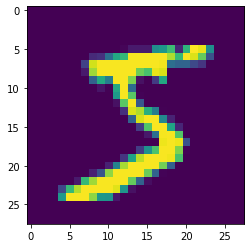

In [168]:
#그려보기
plt.imshow(x_train[0]) #흑백이미지를 일부로 컬러로 만듬

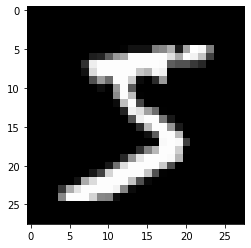

In [170]:
plt.imshow(x_train[0],cmap='gray')

In [172]:
x_train=x_train/255.0  #스케일링이 됨
x_test=x_test/255.0


In [173]:
x_train[0]

array([[0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  ],
       [0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.                  , 0.             

In [177]:
model=Sequential()

In [190]:
from keras.layers import Flatten
#2차원 정보를 1차원 정보로 바꾸는 것. 왜냐하면 뉴런의 연결은 1차원이기 때문


In [191]:
from keras.layers import Dropout
#오버피팅을 막아준다.
from keras.layers import Dense

In [197]:
model=Sequential()

model.add(Flatten(input_shape=(28,28))) 

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.2)) #20%

model.add(Dense(10,activation='softmax')) #다중분류 0~9:10가지

In [203]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])
#     전과는 다른점> 원 핫 이토딩 안해도 됨

In [204]:
model.fit(x_train,y_train,epochs=5) 

Epoch 1/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0330 - acc: 0.9882
Epoch 2/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.0292 - acc: 0.9899
Epoch 3/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0285 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0278 - acc: 0.9909
Epoch 5/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0276 - acc: 0.9903


In [208]:
#5회 학습
model.evaluate(x_test,y_test  )

10000/10000 [==============================] - 0s 28us/step


[0.0864418832032301, 0.9793]

In [211]:
#혈중 지방 함량치 예측
raw_data=np.genfromtxt('C:/Users/User/study_ai/datasets/blood_fat.csv',delimiter=',',
                      skip_header=1)

In [214]:
raw_data
#index.one, weight, age, bloodfat
#체중과 지방을 넣으면 혈중 농도 알려주는 regression

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [215]:
from mpl_toolkits.mplot3d import Axes3D

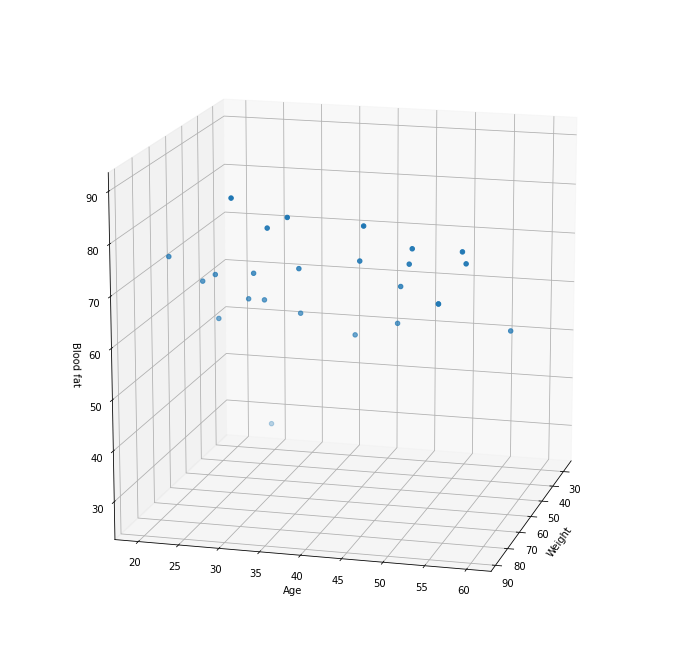

In [225]:
#index.one, weight, age, bloodfat
xs=np.array(raw_data[:,2],dtype=np.float32) #weight
ys=np.array(raw_data[:,3],dtype=np.float32) #age
zs=np.array(raw_data[:,4], dtype=np.float32) #bloodfat
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xs,ys,xs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [227]:
x_data=np.array(raw_data[:,2:4],dtype=np.float32) # 2,3 ==> weight,age
y_data=np.array(raw_data[:,4], dtype=np.float32) #BloodFat
y_data

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209., 290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181., 274., 303., 244.], dtype=float32)

In [228]:
y_data=y_data.reshape((-1,1)) #2차원 구조로 만들기

In [229]:
y_data

array([[354.],
       [190.],
       [405.],
       [263.],
       [451.],
       [302.],
       [288.],
       [385.],
       [402.],
       [365.],
       [209.],
       [290.],
       [346.],
       [254.],
       [395.],
       [434.],
       [220.],
       [374.],
       [308.],
       [220.],
       [311.],
       [181.],
       [274.],
       [303.],
       [244.]], dtype=float32)

In [230]:
from keras.optimizers import RMSprop

In [231]:
model=Sequential()

model.add(Dense(1,input_shape=(2,)))

model.compile(loss='mse',optimizer=RMSprop(lr=0.01))

In [234]:
hist=model.fit(x_data,y_data,epochs=2000)

Epoch 1/2000
25/25 [==============================] - 0s 14ms/step - loss: 100662.5703
Epoch 2/2000
25/25 [==============================] - 0s 78us/step - loss: 98487.0469
Epoch 3/2000
25/25 [==============================] - 0s 41us/step - loss: 96932.3438
Epoch 4/2000
25/25 [==============================] - 0s 79us/step - loss: 95644.4922
Epoch 5/2000
25/25 [==============================] - 0s 160us/step - loss: 94511.4062
Epoch 6/2000
25/25 [==============================] - 0s 39us/step - loss: 93481.2266
Epoch 7/2000
25/25 [==============================] - 0s 40us/step - loss: 92525.0312
Epoch 8/2000
25/25 [==============================] - 0s 40us/step - loss: 91624.8828
Epoch 9/2000
25/25 [==============================] - 0s 40us/step - loss: 90768.7734
Epoch 10/2000
25/25 [==============================] - 0s 40us/step - loss: 89948.2031
Epoch 11/2000
25/25 [==============================] - 0s 40us/step - loss: 89157.0000
Epoch 12/2000
25/25 [=============================

Epoch 96/2000
25/25 [==============================] - 0s 39us/step - loss: 43329.6602
Epoch 97/2000
25/25 [==============================] - 0s 39us/step - loss: 42905.6133
Epoch 98/2000
25/25 [==============================] - 0s 0us/step - loss: 42483.8906
Epoch 99/2000
25/25 [==============================] - 0s 41us/step - loss: 42064.4883
Epoch 100/2000
25/25 [==============================] - 0s 80us/step - loss: 41647.4141
Epoch 101/2000
25/25 [==============================] - 0s 40us/step - loss: 41232.6523
Epoch 102/2000
25/25 [==============================] - 0s 40us/step - loss: 40820.2148
Epoch 103/2000
25/25 [==============================] - 0s 40us/step - loss: 40410.0938
Epoch 104/2000
25/25 [==============================] - 0s 80us/step - loss: 40002.2969
Epoch 105/2000
25/25 [==============================] - 0s 40us/step - loss: 39596.8125
Epoch 106/2000
25/25 [==============================] - 0s 81us/step - loss: 39193.6484
Epoch 107/2000
25/25 [===============

Epoch 190/2000
25/25 [==============================] - 0s 40us/step - loss: 13508.2461
Epoch 191/2000
25/25 [==============================] - 0s 40us/step - loss: 13298.4248
Epoch 192/2000
25/25 [==============================] - 0s 0us/step - loss: 13090.8164
Epoch 193/2000
25/25 [==============================] - 0s 0us/step - loss: 12885.4160
Epoch 194/2000
25/25 [==============================] - 0s 41us/step - loss: 12682.2236
Epoch 195/2000
25/25 [==============================] - 0s 79us/step - loss: 12481.2383
Epoch 196/2000
25/25 [==============================] - 0s 41us/step - loss: 12282.4570
Epoch 197/2000
25/25 [==============================] - 0s 40us/step - loss: 12085.8789
Epoch 198/2000
25/25 [==============================] - 0s 0us/step - loss: 11891.4951
Epoch 199/2000
25/25 [==============================] - 0s 39us/step - loss: 11699.3086
Epoch 200/2000
25/25 [==============================] - 0s 40us/step - loss: 11509.3174
Epoch 201/2000
25/25 [=============

Epoch 285/2000
25/25 [==============================] - 0s 40us/step - loss: 2904.0107
Epoch 286/2000
25/25 [==============================] - 0s 80us/step - loss: 2880.7935
Epoch 287/2000
25/25 [==============================] - 0s 80us/step - loss: 2858.8931
Epoch 288/2000
25/25 [==============================] - 0s 40us/step - loss: 2838.2749
Epoch 289/2000
25/25 [==============================] - 0s 40us/step - loss: 2818.9014
Epoch 290/2000
25/25 [==============================] - 0s 40us/step - loss: 2800.7363
Epoch 291/2000
25/25 [==============================] - 0s 40us/step - loss: 2783.7407
Epoch 292/2000
25/25 [==============================] - 0s 40us/step - loss: 2767.8726
Epoch 293/2000
25/25 [==============================] - 0s 0us/step - loss: 2753.0889
Epoch 294/2000
25/25 [==============================] - 0s 40us/step - loss: 2739.3467
Epoch 295/2000
25/25 [==============================] - 0s 40us/step - loss: 2726.5994
Epoch 296/2000
25/25 [======================

Epoch 380/2000
25/25 [==============================] - 0s 40us/step - loss: 2260.2561
Epoch 381/2000
25/25 [==============================] - 0s 40us/step - loss: 2255.4880
Epoch 382/2000
25/25 [==============================] - 0s 40us/step - loss: 2250.7524
Epoch 383/2000
25/25 [==============================] - 0s 79us/step - loss: 2246.0493
Epoch 384/2000
25/25 [==============================] - 0s 39us/step - loss: 2241.3782
Epoch 385/2000
25/25 [==============================] - 0s 40us/step - loss: 2236.7400
Epoch 386/2000
25/25 [==============================] - 0s 39us/step - loss: 2232.1335
Epoch 387/2000
25/25 [==============================] - 0s 40us/step - loss: 2227.5588
Epoch 388/2000
25/25 [==============================] - 0s 40us/step - loss: 2223.0168
Epoch 389/2000
25/25 [==============================] - 0s 40us/step - loss: 2218.5063
Epoch 390/2000
25/25 [==============================] - 0s 39us/step - loss: 2214.0276
Epoch 391/2000
25/25 [=====================

Epoch 475/2000
25/25 [==============================] - 0s 80us/step - loss: 1944.2875
Epoch 476/2000
25/25 [==============================] - 0s 40us/step - loss: 1942.3470
Epoch 477/2000
25/25 [==============================] - 0s 40us/step - loss: 1940.3931
Epoch 478/2000
25/25 [==============================] - 0s 40us/step - loss: 1938.5010
Epoch 479/2000
25/25 [==============================] - 0s 40us/step - loss: 1936.5967
Epoch 480/2000
25/25 [==============================] - 0s 80us/step - loss: 1934.7521
Epoch 481/2000
25/25 [==============================] - 0s 40us/step - loss: 1932.9023
Epoch 482/2000
25/25 [==============================] - 0s 40us/step - loss: 1931.1084
Epoch 483/2000
25/25 [==============================] - 0s 40us/step - loss: 1929.3148
Epoch 484/2000
25/25 [==============================] - 0s 40us/step - loss: 1927.5748
Epoch 485/2000
25/25 [==============================] - 0s 40us/step - loss: 1925.8372
Epoch 486/2000
25/25 [=====================

Epoch 570/2000
25/25 [==============================] - 0s 40us/step - loss: 1863.0646
Epoch 571/2000
25/25 [==============================] - 0s 40us/step - loss: 1862.9745
Epoch 572/2000
25/25 [==============================] - 0s 40us/step - loss: 1862.8940
Epoch 573/2000
25/25 [==============================] - 0s 40us/step - loss: 1862.8113
Epoch 574/2000
25/25 [==============================] - 0s 40us/step - loss: 1862.7367
Epoch 575/2000
25/25 [==============================] - 0s 0us/step - loss: 1862.6606
Epoch 576/2000
25/25 [==============================] - 0s 40us/step - loss: 1862.5916
Epoch 577/2000
25/25 [==============================] - 0s 40us/step - loss: 1862.5203
Epoch 578/2000
25/25 [==============================] - 0s 0us/step - loss: 1862.4558
Epoch 579/2000
25/25 [==============================] - 0s 39us/step - loss: 1862.3900
Epoch 580/2000
25/25 [==============================] - 0s 40us/step - loss: 1862.3293
Epoch 581/2000
25/25 [=======================

Epoch 665/2000
25/25 [==============================] - 0s 199us/step - loss: 1858.7170
Epoch 666/2000
25/25 [==============================] - 0s 39us/step - loss: 1858.6787
Epoch 667/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.6385
Epoch 668/2000
25/25 [==============================] - 0s 0us/step - loss: 1858.6010
Epoch 669/2000
25/25 [==============================] - 0s 39us/step - loss: 1858.5604
Epoch 670/2000
25/25 [==============================] - 0s 0us/step - loss: 1858.5228
Epoch 671/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.4825
Epoch 672/2000
25/25 [==============================] - 0s 39us/step - loss: 1858.4442
Epoch 673/2000
25/25 [==============================] - 0s 0us/step - loss: 1858.4041
Epoch 674/2000
25/25 [==============================] - 0s 39us/step - loss: 1858.3660
Epoch 675/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.3258
Epoch 676/2000
25/25 [=======================

Epoch 760/2000
25/25 [==============================] - 0s 0us/step - loss: 1855.0244
Epoch 761/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.9844
Epoch 762/2000
25/25 [==============================] - 0s 39us/step - loss: 1854.9465
Epoch 763/2000
25/25 [==============================] - 0s 41us/step - loss: 1854.9073
Epoch 764/2000
25/25 [==============================] - 0s 39us/step - loss: 1854.8695
Epoch 765/2000
25/25 [==============================] - 0s 41us/step - loss: 1854.8302
Epoch 766/2000
25/25 [==============================] - 0s 39us/step - loss: 1854.7925
Epoch 767/2000
25/25 [==============================] - 0s 39us/step - loss: 1854.7529
Epoch 768/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.7148
Epoch 769/2000
25/25 [==============================] - 0s 80us/step - loss: 1854.6759
Epoch 770/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.6383
Epoch 771/2000
25/25 [======================

Epoch 855/2000
25/25 [==============================] - 0s 41us/step - loss: 1851.3805
Epoch 856/2000
25/25 [==============================] - 0s 39us/step - loss: 1851.3438
Epoch 857/2000
25/25 [==============================] - 0s 80us/step - loss: 1851.3043
Epoch 858/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.2671
Epoch 859/2000
25/25 [==============================] - 0s 0us/step - loss: 1851.2281
Epoch 860/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.1909
Epoch 861/2000
25/25 [==============================] - 0s 41us/step - loss: 1851.1519
Epoch 862/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.1147
Epoch 863/2000
25/25 [==============================] - 0s 39us/step - loss: 1851.0759
Epoch 864/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.0386
Epoch 865/2000
25/25 [==============================] - 0s 41us/step - loss: 1851.0000
Epoch 866/2000
25/25 [======================

Epoch 950/2000
25/25 [==============================] - 0s 41us/step - loss: 1847.7892
Epoch 951/2000
25/25 [==============================] - 0s 39us/step - loss: 1847.7506
Epoch 952/2000
25/25 [==============================] - 0s 0us/step - loss: 1847.7144
Epoch 953/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.6758
Epoch 954/2000
25/25 [==============================] - 0s 0us/step - loss: 1847.6395
Epoch 955/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.6010
Epoch 956/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.5643
Epoch 957/2000
25/25 [==============================] - 0s 41us/step - loss: 1847.5262
Epoch 958/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.4893
Epoch 959/2000
25/25 [==============================] - 0s 0us/step - loss: 1847.4507
Epoch 960/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.4146
Epoch 961/2000
25/25 [========================

Epoch 1044/2000
25/25 [==============================] - 0s 80us/step - loss: 1844.2855
Epoch 1045/2000
25/25 [==============================] - 0s 40us/step - loss: 1844.2467
Epoch 1046/2000
25/25 [==============================] - 0s 0us/step - loss: 1844.2111
Epoch 1047/2000
25/25 [==============================] - 0s 0us/step - loss: 1844.1731
Epoch 1048/2000
25/25 [==============================] - 0s 40us/step - loss: 1844.1372
Epoch 1049/2000
25/25 [==============================] - 0s 39us/step - loss: 1844.0994
Epoch 1050/2000
25/25 [==============================] - 0s 0us/step - loss: 1844.0631
Epoch 1051/2000
25/25 [==============================] - 0s 80us/step - loss: 1844.0256
Epoch 1052/2000
25/25 [==============================] - 0s 41us/step - loss: 1843.9893
Epoch 1053/2000
25/25 [==============================] - 0s 39us/step - loss: 1843.9515
Epoch 1054/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.9156
Epoch 1055/2000
25/25 [============

Epoch 1138/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.8311
Epoch 1139/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.7936
Epoch 1140/2000
25/25 [==============================] - 0s 80us/step - loss: 1840.7578
Epoch 1141/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.7206
Epoch 1142/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.6851
Epoch 1143/2000
25/25 [==============================] - 0s 0us/step - loss: 1840.6477
Epoch 1144/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.6122
Epoch 1145/2000
25/25 [==============================] - 0s 0us/step - loss: 1840.5748
Epoch 1146/2000
25/25 [==============================] - 0s 39us/step - loss: 1840.5394
Epoch 1147/2000
25/25 [==============================] - 0s 41us/step - loss: 1840.5016
Epoch 1148/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.4663
Epoch 1149/2000
25/25 [===========

Epoch 1232/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.4259
Epoch 1233/2000
25/25 [==============================] - 0s 81us/step - loss: 1837.3892
Epoch 1234/2000
25/25 [==============================] - 0s 80us/step - loss: 1837.3538
Epoch 1235/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.3168
Epoch 1236/2000
25/25 [==============================] - 0s 0us/step - loss: 1837.2820
Epoch 1237/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.2450
Epoch 1238/2000
25/25 [==============================] - 0s 0us/step - loss: 1837.2106
Epoch 1239/2000
25/25 [==============================] - 0s 39us/step - loss: 1837.1737
Epoch 1240/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.1384
Epoch 1241/2000
25/25 [==============================] - 0s 120us/step - loss: 1837.1019
Epoch 1242/2000
25/25 [==============================] - 0s 39us/step - loss: 1837.0669
Epoch 1243/2000
25/25 [==========

Epoch 1326/2000
25/25 [==============================] - 0s 40us/step - loss: 1834.0704
Epoch 1327/2000
25/25 [==============================] - 0s 41us/step - loss: 1834.0344
Epoch 1328/2000
25/25 [==============================] - 0s 39us/step - loss: 1833.9999
Epoch 1329/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.9634
Epoch 1330/2000
25/25 [==============================] - 0s 0us/step - loss: 1833.9290
Epoch 1331/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.8927
Epoch 1332/2000
25/25 [==============================] - 0s 0us/step - loss: 1833.8582
Epoch 1333/2000
25/25 [==============================] - 0s 39us/step - loss: 1833.8221
Epoch 1334/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.7876
Epoch 1335/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.7510
Epoch 1336/2000
25/25 [==============================] - 0s 80us/step - loss: 1833.7169
Epoch 1337/2000
25/25 [===========

Epoch 1420/2000
25/25 [==============================] - 0s 0us/step - loss: 1830.7651
Epoch 1421/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.7290
Epoch 1422/2000
25/25 [==============================] - 0s 0us/step - loss: 1830.6953
Epoch 1423/2000
25/25 [==============================] - 0s 80us/step - loss: 1830.6594
Epoch 1424/2000
25/25 [==============================] - 0s 0us/step - loss: 1830.6254
Epoch 1425/2000
25/25 [==============================] - 0s 0us/step - loss: 1830.5897
Epoch 1426/2000
25/25 [==============================] - 0s 41us/step - loss: 1830.5559
Epoch 1427/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.5199
Epoch 1428/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.4862
Epoch 1429/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.4498
Epoch 1430/2000
25/25 [==============================] - 0s 40us/step - loss: 1830.4164
Epoch 1431/2000
25/25 [=============

Epoch 1514/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.5090
Epoch 1515/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.4739
Epoch 1516/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.4403
Epoch 1517/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.4048
Epoch 1518/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.3723
Epoch 1519/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.3361
Epoch 1520/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.3032
Epoch 1521/2000
25/25 [==============================] - 0s 0us/step - loss: 1827.2675
Epoch 1522/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.2344
Epoch 1523/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.1986
Epoch 1524/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.1656
Epoch 1525/2000
25/25 [==========

Epoch 1608/2000
25/25 [==============================] - 0s 40us/step - loss: 1824.3031
Epoch 1609/2000
25/25 [==============================] - 0s 80us/step - loss: 1824.2679
Epoch 1610/2000
25/25 [==============================] - 0s 40us/step - loss: 1824.2347
Epoch 1611/2000
25/25 [==============================] - 0s 39us/step - loss: 1824.1998
Epoch 1612/2000
25/25 [==============================] - 0s 40us/step - loss: 1824.1674
Epoch 1613/2000
25/25 [==============================] - 0s 40us/step - loss: 1824.1323
Epoch 1614/2000
25/25 [==============================] - 0s 0us/step - loss: 1824.0999
Epoch 1615/2000
25/25 [==============================] - 0s 40us/step - loss: 1824.0648
Epoch 1616/2000
25/25 [==============================] - 0s 39us/step - loss: 1824.0323
Epoch 1617/2000
25/25 [==============================] - 0s 39us/step - loss: 1823.9976
Epoch 1618/2000
25/25 [==============================] - 0s 40us/step - loss: 1823.9647
Epoch 1619/2000
25/25 [==========

Epoch 1702/2000
25/25 [==============================] - 0s 0us/step - loss: 1821.1460
Epoch 1703/2000
25/25 [==============================] - 0s 40us/step - loss: 1821.1116
Epoch 1704/2000
25/25 [==============================] - 0s 40us/step - loss: 1821.0789
Epoch 1705/2000
25/25 [==============================] - 0s 40us/step - loss: 1821.0452
Epoch 1706/2000
25/25 [==============================] - 0s 40us/step - loss: 1821.0127
Epoch 1707/2000
25/25 [==============================] - 0s 0us/step - loss: 1820.9783
Epoch 1708/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.9459
Epoch 1709/2000
25/25 [==============================] - 0s 0us/step - loss: 1820.9114
Epoch 1710/2000
25/25 [==============================] - 0s 39us/step - loss: 1820.8796
Epoch 1711/2000
25/25 [==============================] - 0s 80us/step - loss: 1820.8453
Epoch 1712/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.8135
Epoch 1713/2000
25/25 [============

Epoch 1796/2000
25/25 [==============================] - 0s 40us/step - loss: 1818.0386
Epoch 1797/2000
25/25 [==============================] - 0s 40us/step - loss: 1818.0044
Epoch 1798/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.9731
Epoch 1799/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.9392
Epoch 1800/2000
25/25 [==============================] - 0s 39us/step - loss: 1817.9075
Epoch 1801/2000
25/25 [==============================] - 0s 0us/step - loss: 1817.8738
Epoch 1802/2000
25/25 [==============================] - 0s 39us/step - loss: 1817.8419
Epoch 1803/2000
25/25 [==============================] - 0s 41us/step - loss: 1817.8080
Epoch 1804/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.7761
Epoch 1805/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.7423
Epoch 1806/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.7111
Epoch 1807/2000
25/25 [==========

Epoch 1890/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.9806
Epoch 1891/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.9471
Epoch 1892/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.9159
Epoch 1893/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.8824
Epoch 1894/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.8519
Epoch 1895/2000
25/25 [==============================] - 0s 0us/step - loss: 1814.8186
Epoch 1896/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.7872
Epoch 1897/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.7534
Epoch 1898/2000
25/25 [==============================] - 0s 41us/step - loss: 1814.7225
Epoch 1899/2000
25/25 [==============================] - 0s 39us/step - loss: 1814.6896
Epoch 1900/2000
25/25 [==============================] - 0s 39us/step - loss: 1814.6586
Epoch 1901/2000
25/25 [==========

Epoch 1984/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.9719
Epoch 1985/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.9396
Epoch 1986/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.9087
Epoch 1987/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.8761
Epoch 1988/2000
25/25 [==============================] - 0s 0us/step - loss: 1811.8452
Epoch 1989/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.8126
Epoch 1990/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.7819
Epoch 1991/2000
25/25 [==============================] - 0s 39us/step - loss: 1811.7490
Epoch 1992/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.7184
Epoch 1993/2000
25/25 [==============================] - 0s 0us/step - loss: 1811.6858
Epoch 1994/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.6552
Epoch 1995/2000
25/25 [===========

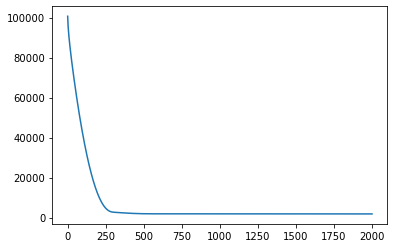

In [236]:
plt.plot(hist.history['loss'])

In [238]:
model.predict(np.array([100,40]).reshape(1,2)) #100키로에 40세
#array([[347.3552]], dtype=float32)

array([[347.3552]], dtype=float32)

In [239]:
model.predict(np.array([60,25]).reshape(1,2)) #60키로에 25세

array([[221.46422]], dtype=float32)

In [243]:
#기울기와 절편 알아보자
W_, b_=model.get_weights()
print(W_) #기울기
print(b_) #절편
#[array([[1.085751], 기울기
#        [5.497396]], dtype=float32), #절편
 #array([18.884241], dtype=float32)]

[[1.085751]
 [5.497396]]
[18.884241]


In [252]:
x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
X=np.concatenate((x,y),axis=1)
Z=np.matmul(X,W_) + b_ #행렬곱 matrix multiply, y=X*W+b같은 느낌
Z

array([[ 95.57322216033936],
       [104.07738224340945],
       [112.58154232647955],
       [121.08570240954964],
       [129.58986249261972],
       [138.09402257568982],
       [146.59818265875992],
       [155.10234274183   ],
       [163.6065028249001 ],
       [172.1106629079702 ],
       [180.61482299104028],
       [189.1189830741104 ],
       [197.62314315718046],
       [206.12730324025057],
       [214.63146332332065],
       [223.13562340639078],
       [231.63978348946085],
       [240.14394357253093],
       [248.64810365560106],
       [257.1522637386711 ],
       [265.6564238217412 ],
       [274.16058390481135],
       [282.6647439878814 ],
       [291.16890407095156],
       [299.6730641540216 ],
       [308.1772242370917 ],
       [316.6813843201618 ],
       [325.1855444032319 ],
       [333.68970448630193],
       [342.19386456937207],
       [350.6980246524422 ],
       [359.2021847355123 ],
       [367.70634481858235],
       [376.2105049016524 ],
       [384.71

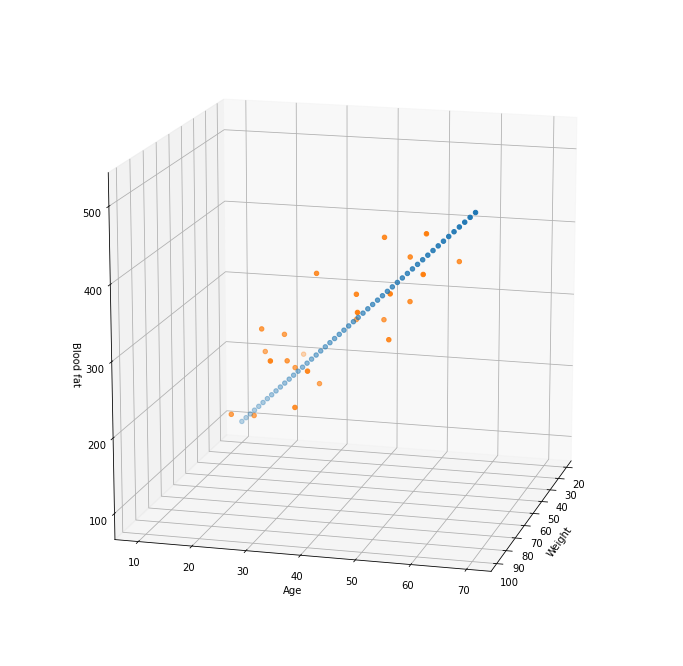

In [255]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,Z)
ax.scatter(xs,ys,zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()
#3차원 공간 상의 경향을 잘 나타냄

In [ ]:
#학습을 많이 한다고 해서 test loss 가 떨어지는게 아니다. 순간 올라갈 수도 있다. 난수 발생할수도
#많이 돌려보고 알아야 함. 맞추기 쉽지 않음 => earlystopping 기능 있음
#훈련한 내용을 디스트에 저장 가능. 메모리상에 있던 것을 디스크상에 저장하는 기법.